In [2]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 9.0 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 22.6 MB/s eta 0:00:00
     ---------------------------------------- 52.1/52.1 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 29.6 MB/s eta 0:00:00
     ------------------------------------- 895.5/895.5 KB 27.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


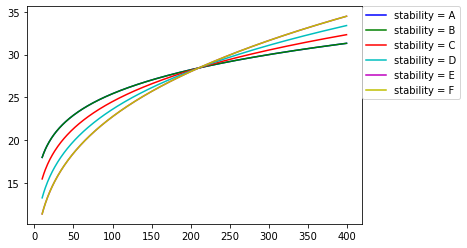

In [4]:

import math
from matplotlib import pyplot as plt

#Gaussian plume model

# Stability level
A = 0.1504
B = 0.1504
C = 0.1998
D = 0.2504
E = 0.3004
F = 0.3004

#coefficient of the stability level
coefficient_A = [5.357, 0.8828, -0.0076, 6.035, 2.1097, 0.2770]
coefficient_B = [5.058, 0.9024, -0.0096, 4.694, 1.0629, 0.0136]
coefficient_C = [4.561, 0.9181, -0.0076, 4.11, 0.9201, -0.002]
coefficient_D = [4.23, 0.9222, -0.0087, 3.414, 0.7371, -0.0316]
coefficient_E = [3.922, 0.9222, -0.0064, 3.057, 0.6794, -0.045]
coefficient_F = [3.533, 0.9181, -0.007, 2.621, 0.6564, -0.054]

#calculation of wind speed at stack height
def windSpeedAtStackHeight(stability, anemometerHeight, windSpeedAtAH, stackHeight):
    windSpeedAtSH = windSpeedAtAH * (stackHeight / anemometerHeight)**stability
    return windSpeedAtSH

#calculation of plume rise
def plumeRise(dStack, vStackGas, windSpeed, tStackGas, tAmbient):
    dT = tStackGas - tAmbient
    dH = dStack*(vStackGas/windSpeed)**0.25 * (1+(dT/tStackGas))
    return dH


def sigY(x, coefficient):
    return math.exp(coefficient[0] + coefficient[1]*math.log(x/1000) + coefficient[2]* (math.log(x/1000))**2)

def sigZ(x, coefficient):
    return math.exp(coefficient[3] + coefficient[4]*math.log(x/1000) + coefficient[5]* (math.log(x/1000))**2)

##gaussian plume model equation
def gaussianPlume(stability, anemometerHeight, windSpeedAtAH, stackHeight,
                  dStack, vStackGas, tStackGas, tAmbient,
                  x, coefficient,
                  Q, y, z):
    windSpeed = windSpeedAtStackHeight(stability, anemometerHeight, windSpeedAtAH, stackHeight)
    #print("windspeed:",windSpeed)
    dH = plumeRise(dStack, vStackGas, windSpeed,tStackGas, tAmbient)
    #print("dH:",dH)
    Hs = stackHeight + dH
    #print("stack height:",Hs)
    Sy = sigY(x, coefficient)
    #print("sigy:",Sy)
    Sz = sigZ(x, coefficient)
    #print("sigz:",Sz)

    C = (Q/(2 * math.pi * windSpeed * Sy * Sz)) * math.exp((-y**2)/(2*Sy**2)) * (math.exp(-(z + Hs)**2/(2*Sz**2)) + math.exp(-(z - Hs)**2/(2*Sz**2)))
    return C * 1000000 #unit: Microgram/meter cube

# def gaussianPlumeGroundLevel(stability, anemometerHeight, windSpeedAtAH, stackHeight,
#                   dStack, vStackGas, tStackGas, tAmbient,
#                   x, coefficient,
#                   Q, y):
#     windSpeed = windSpeedAtStackHeight(stability, anemometerHeight, windSpeedAtAH, stackHeight)
#     dH = plumeRise(dStack, vStackGas, windSpeed, tStackGas, tAmbient)
#     Hs = stackHeight - dH
#     Sy = sigY(x, coefficient)
#     Sz = sigZ(x, coefficient)
#
#     C = (Q / (2 * math.pi * windSpeed * Sy * Sz)) * math.exp((-y ** 2) / (2 * Sy**2)) * (math.exp(-Hs**2/(2 * Sz ** 2)))
#     return C

#default values for the model
stability = [A,B,C,D,E,F]
AH = 10
windSpeedAtAH = 5
stackHeight = 210

dS = 4.5
vStackGas = 23.34
tStackGas = 400
tAmbient = 298.15

x = 1000
coefficient = coefficient_A

Q = 50
y = 5
z = 215

#graphs of gaussian plume model under different condition.

# for i in stability:
#     print(gaussianPlume(i, AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient, Q, y, z))
graph_0 = []
graph_1 = []
graph_2 = []
graph_3 = []
graph_4 = []
graph_5 = []
xaxis = []

# Test under different stability and emission rate
# for i in range(10,50):
#     C_a = gaussianPlume(stability[0], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         i, y, z)
#     C_b = gaussianPlume(stability[1], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         i, y, z)
#     C_c = gaussianPlume(stability[2], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         i, y, z)
#     C_d = gaussianPlume(stability[3], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         i, y, z)
#     C_e = gaussianPlume(stability[4], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         i, y, z)
#     C_f = gaussianPlume(stability[5], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         i, y, z)
#     graph_0.append(C_a)
#     graph_1.append(C_b)
#     graph_2.append(C_c)
#     graph_3.append(C_d)
#     graph_4.append(C_e)
#     graph_5.append(C_f)
#     xaxis.append(i)


#Ah
for i in range(10,400):
    C_a = gaussianPlume(stability[0], i, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
                        Q, y, z)
    C_b = gaussianPlume(stability[1], i, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
                        Q, y, z)
    C_c = gaussianPlume(stability[2], i, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
                        Q, y, z)
    C_d = gaussianPlume(stability[3], i, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
                        Q, y, z)
    C_e = gaussianPlume(stability[4], i, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
                        Q, y, z)
    C_f = gaussianPlume(stability[5], i, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
                        Q, y, z)
    graph_0.append(C_a)
    graph_1.append(C_b)
    graph_2.append(C_c)
    graph_3.append(C_d)
    graph_4.append(C_e)
    graph_5.append(C_f)
    xaxis.append(i)

#windspeed at AH
# for i in range(5,20):
#     C_a = gaussianPlume(stability[0], AH, i, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_b = gaussianPlume(stability[1], AH, i, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_c = gaussianPlume(stability[2], AH, i, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_d = gaussianPlume(stability[3], AH, i, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_e = gaussianPlume(stability[4], AH, i, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_f = gaussianPlume(stability[5], AH, i, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     graph_0.append(C_a)
#     graph_1.append(C_b)
#     graph_2.append(C_c)
#     graph_3.append(C_d)
#     graph_4.append(C_e)
#     graph_5.append(C_f)
#     xaxis.append(i)

#stack height
# for i in range(100,300):
#     C_a = gaussianPlume(stability[0], AH, windSpeedAtAH, i, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_b = gaussianPlume(stability[1], AH, windSpeedAtAH, i, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_c = gaussianPlume(stability[2], AH, windSpeedAtAH, i, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_d = gaussianPlume(stability[3], AH, windSpeedAtAH, i, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_e = gaussianPlume(stability[4], AH, windSpeedAtAH, i, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     C_f = gaussianPlume(stability[5], AH, windSpeedAtAH, i, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z)
#     graph_0.append(C_a)
#     graph_1.append(C_b)
#     graph_2.append(C_c)
#     graph_3.append(C_d)
#     graph_4.append(C_e)
#     graph_5.append(C_f)
#     xaxis.append(i)

#Distance traveled
# for i in range(500,1500):
#     C_a = gaussianPlume(stability[0], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, i, coefficient,
#                         Q, y, z)
#     C_b = gaussianPlume(stability[1], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, i, coefficient,
#                         Q, y, z)
#     C_c = gaussianPlume(stability[2], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, i, coefficient,
#                         Q, y, z)
#     C_d = gaussianPlume(stability[3], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, i, coefficient,
#                         Q, y, z)
#     C_e = gaussianPlume(stability[4], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, i, coefficient,
#                         Q, y, z)
#     C_f = gaussianPlume(stability[5], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, i, coefficient,
#                         Q, y, z)
#     graph_0.append(C_a)
#     graph_1.append(C_b)
#     graph_2.append(C_c)
#     graph_3.append(C_d)
#     graph_4.append(C_e)
#     graph_5.append(C_f)
#     xaxis.append(i)

#Crosswind
# for i in range(5,20):
#     C_a = gaussianPlume(stability[0], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, i, z)
#     C_b = gaussianPlume(stability[1], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, i, z)
#     C_c = gaussianPlume(stability[2], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, i, z)
#     C_d = gaussianPlume(stability[3], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, i, z)
#     C_e = gaussianPlume(stability[4], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, i, z)
#     C_f = gaussianPlume(stability[5], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, i, z)
#     graph_0.append(C_a)
#     graph_1.append(C_b)
#     graph_2.append(C_c)
#     graph_3.append(C_d)
#     graph_4.append(C_e)
#     graph_5.append(C_f)
#     xaxis.append(i)

#elevation of the receiver
# for i in range(150,300):
#     C_a = gaussianPlume(stability[0], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, i)
#     C_b = gaussianPlume(stability[1], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, i)
#     C_c = gaussianPlume(stability[2], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, i)
#     C_d = gaussianPlume(stability[3], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, i)
#     C_e = gaussianPlume(stability[4], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, i)
#     C_f = gaussianPlume(stability[5], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, i)
#     graph_0.append(C_a)
#     graph_1.append(C_b)
#     graph_2.append(C_c)
#     graph_3.append(C_d)
#     graph_4.append(C_e)
#     graph_5.append(C_f)
#     xaxis.append(i)

plt.plot(xaxis, graph_0, 'b', label = 'stability = A')
plt.plot(xaxis, graph_1, 'g', label = 'stability = B')
plt.plot(xaxis, graph_2, 'r', label = 'stability = C')
plt.plot(xaxis, graph_3, 'c', label = 'stability = D')
plt.plot(xaxis, graph_4, 'm', label = 'stability = E')
plt.plot(xaxis, graph_5, 'y', label = 'stability = F')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
plt.show()

#print("Concentration of the pollutant:",gaussianPlume(stability[0], AH, windSpeedAtAH, stackHeight, dS, vStackGas, tStackGas, tAmbient, x, coefficient,
#                         Q, y, z))